# Proyecto 4
## Pamela Salazar

In [1]:
import pandas as pd
import os

1. Crear una tabla de los archvivos con sus respectivas carpetas

In [2]:
contenido = os.listdir()
archvos_list = []
carpeta_list = []
carpeta_list1 = []
for carpeta in contenido:
    try: 
        archivos = os.listdir(carpeta)
        carpeta_list1.append(carpeta)
        for archivo in archivos:
            if archivo.endswith('wav'):
                archvos_list.append(archivo)
                carpeta_list.append(carpeta)
    except:
        print("No es una carpeta")
    #if os.path.isfile(os.path.join(fichero)) and fichero.endswith('wav'):
    #    imagenes.append(fichero)
   
df = pd.DataFrame()
df['Carpeta']  = carpeta_list
df['Archivos'] = archvos_list 
df

No es una carpeta
No es una carpeta
No es una carpeta
No es una carpeta
No es una carpeta
No es una carpeta
No es una carpeta


,Carpeta,Archivos
0,bed,00176480_nohash_0.wav
1,bed,004ae714_nohash_0.wav
2,bed,004ae714_nohash_1.wav
3,bed,00f0204f_nohash_0.wav
4,bed,00f0204f_nohash_1.wav
...,...,...
65120,_background_noise_,dude_miaowing.wav
65121,_background_noise_,exercise_bike.wav
65122,_background_noise_,pink_noise.wav
65123,_background_noise_,running_tap.wav


2. Clasificar las muestras 

In [3]:
clases_list = []
clasesID_list = []
for carpeta in df['Carpeta']:
    if carpeta == 'yes':
        clase = 'yes'
        id = 0
    elif carpeta == 'no':
        clase = 'no'
        id = 1
    elif carpeta == 'up':
        clase = 'up'
        id = 2
    elif carpeta == 'down':
        clase = 'down'
        id = 3
    elif carpeta == 'left':
        clase = 'left'
        id = 4
    elif carpeta == 'right':
        clase = 'right'
        id = 5
    elif carpeta == 'on':
        clase = 'on'
        id = 6
    elif carpeta == 'off':
        clase = 'off'
        id = 7
    elif carpeta == 'stop':
        clase = 'stop'
        id = 8
    elif carpeta == 'go':
        clase = 'go'
        id = 9
    elif carpeta == '_background_noise_':
        clase = 'silencio/rudio de fondo'
        id = 10
    else:
        clase = 'desconocido'
        id = 11
    clases_list.append(clase)
    clasesID_list.append(id)
df['Clase'] = clases_list
df['Clase ID'] = clasesID_list

df

,Carpeta,Archivos,Clase,Clase ID
0,bed,00176480_nohash_0.wav,desconocido,11
1,bed,004ae714_nohash_0.wav,desconocido,11
2,bed,004ae714_nohash_1.wav,desconocido,11
3,bed,00f0204f_nohash_0.wav,desconocido,11
4,bed,00f0204f_nohash_1.wav,desconocido,11
...,...,...,...,...
65120,_background_noise_,dude_miaowing.wav,silencio/rudio de fondo,10
65121,_background_noise_,exercise_bike.wav,silencio/rudio de fondo,10
65122,_background_noise_,pink_noise.wav,silencio/rudio de fondo,10
65123,_background_noise_,running_tap.wav,silencio/rudio de fondo,10


3. Separar  el conjunto de entrenamiento y validacion

In [4]:
df_test= pd.DataFrame()
f = open('validation_list.txt')
carpetas_list = []
archivos_list = []
mensaje = f.read()
f.close()
carpeta_y_archivo = mensaje.split('\n')
for archivo in carpeta_y_archivo:
    archivo_list = archivo.split('/')
    if len(archivo_list) == 2:
        carpetas_list.append(archivo_list[0])
        archivos_list.append(archivo_list[1])
    #archivos_list.append(archivo_list[1])

df_test['Carpeta'] =  carpetas_list
df_test['Archivos'] =  archivos_list
df_test['Group'] = 'Test'
df_test

,Carpeta,Archivos,Group
0,bed,026290a7_nohash_0.wav,Test
1,bed,060cd039_nohash_0.wav,Test
2,bed,060cd039_nohash_1.wav,Test
3,bed,099d52ad_nohash_0.wav,Test
4,bed,0e17f595_nohash_0.wav,Test
...,...,...,...
6793,zero,fa7895de_nohash_0.wav,Test
6794,zero,fa7895de_nohash_1.wav,Test
6795,zero,fd32732a_nohash_0.wav,Test
6796,zero,fde2dee7_nohash_0.wav,Test


In [5]:
df = pd.merge(df,df_test,how='outer')
df = df.fillna("Train")

In [6]:
df

,Carpeta,Archivos,Clase,Clase ID,Group
0,bed,00176480_nohash_0.wav,desconocido,11,Train
1,bed,004ae714_nohash_0.wav,desconocido,11,Train
2,bed,004ae714_nohash_1.wav,desconocido,11,Train
3,bed,00f0204f_nohash_0.wav,desconocido,11,Train
4,bed,00f0204f_nohash_1.wav,desconocido,11,Train
...,...,...,...,...,...
65120,_background_noise_,dude_miaowing.wav,silencio/rudio de fondo,10,Train
65121,_background_noise_,exercise_bike.wav,silencio/rudio de fondo,10,Train
65122,_background_noise_,pink_noise.wav,silencio/rudio de fondo,10,Train
65123,_background_noise_,running_tap.wav,silencio/rudio de fondo,10,Train


In [7]:
grouped = df.groupby(df.Group)
df_test = grouped.get_group("Test")
df_test

,Carpeta,Archivos,Clase,Clase ID,Group
18,bed,026290a7_nohash_0.wav,desconocido,11,Test
35,bed,060cd039_nohash_0.wav,desconocido,11,Test
36,bed,060cd039_nohash_1.wav,desconocido,11,Test
45,bed,099d52ad_nohash_0.wav,desconocido,11,Test
66,bed,0e17f595_nohash_0.wav,desconocido,11,Test
...,...,...,...,...,...
65073,zero,fa7895de_nohash_0.wav,desconocido,11,Test
65074,zero,fa7895de_nohash_1.wav,desconocido,11,Test
65093,zero,fd32732a_nohash_0.wav,desconocido,11,Test
65099,zero,fde2dee7_nohash_0.wav,desconocido,11,Test


In [8]:
grouped = df.groupby(df.Group)
df_train = grouped.get_group("Train")
df_train

,Carpeta,Archivos,Clase,Clase ID,Group
0,bed,00176480_nohash_0.wav,desconocido,11,Train
1,bed,004ae714_nohash_0.wav,desconocido,11,Train
2,bed,004ae714_nohash_1.wav,desconocido,11,Train
3,bed,00f0204f_nohash_0.wav,desconocido,11,Train
4,bed,00f0204f_nohash_1.wav,desconocido,11,Train
...,...,...,...,...,...
65120,_background_noise_,dude_miaowing.wav,silencio/rudio de fondo,10,Train
65121,_background_noise_,exercise_bike.wav,silencio/rudio de fondo,10,Train
65122,_background_noise_,pink_noise.wav,silencio/rudio de fondo,10,Train
65123,_background_noise_,running_tap.wav,silencio/rudio de fondo,10,Train


4. Espectograma

In [9]:
import librosa
import numpy as np
import pickle

In [10]:
def spectogram (audio_file):
    fs = 16000
    y, sr = librosa.load(audio_file, sr = 16000)
    if len(y) < fs:
       y = np.concatenate((y,np.zeros((fs-len(y)),dtype='int')))
    elif len(y) > fs:
        y = y[:fs]
    S = librosa.feature.melspectrogram(y=y, sr=fs, n_mels=40,n_fft =  25*fs//1000, win_length = 25*fs//1000, hop_length = 10*fs//1000, center=True,
        power=2)
    S_dB = librosa.power_to_db(S, ref=np.max)
    return S_dB

In [11]:
audio_file = 'bed/00f0204f_nohash_0.wav'

En la siguiente celda se guarda el espectograma de cada archivo de audio en un archivo dentro de la carpeta 'espectogramas'. Estacelda esta comentada para que no se vuleva a correr en caso de reiniciar el Jupyter. 

In [12]:
#for i in range(len(df['Archivos'])):
#    file = df['Archivos'][i]
#    carpeta = df['Carpeta'][i]
#    path_audio = carpeta +  '/' + file
#    name, extension = file.split('.')
#    file_name = carpeta +  '_' +  name + '.pickle'
#    S_dB = spectogram (path_audio)   
#    path = 'espectogramas/'+ file_name
#    with open(path, "wb") as f:
#        pickle.dump(S_dB, f)

In [13]:
espectograma = []
for i in range(len(df['Archivos'])):
    file = df['Archivos'][i]
    carpeta = df['Carpeta'][i]
    name, extension = file.split('.')
    file_name = carpeta +  '_' +  name + '.pickle'
    espectograma.append(file_name)
df['Path de espectograma'] = espectograma
df

,Carpeta,Archivos,Clase,Clase ID,Group,Path de espectograma
0,bed,00176480_nohash_0.wav,desconocido,11,Train,bed_00176480_nohash_0.pickle
1,bed,004ae714_nohash_0.wav,desconocido,11,Train,bed_004ae714_nohash_0.pickle
2,bed,004ae714_nohash_1.wav,desconocido,11,Train,bed_004ae714_nohash_1.pickle
3,bed,00f0204f_nohash_0.wav,desconocido,11,Train,bed_00f0204f_nohash_0.pickle
4,bed,00f0204f_nohash_1.wav,desconocido,11,Train,bed_00f0204f_nohash_1.pickle
...,...,...,...,...,...,...
65120,_background_noise_,dude_miaowing.wav,silencio/rudio de fondo,10,Train,_background_noise__dude_miaowing.pickle
65121,_background_noise_,exercise_bike.wav,silencio/rudio de fondo,10,Train,_background_noise__exercise_bike.pickle
65122,_background_noise_,pink_noise.wav,silencio/rudio de fondo,10,Train,_background_noise__pink_noise.pickle
65123,_background_noise_,running_tap.wav,silencio/rudio de fondo,10,Train,_background_noise__running_tap.pickle


10. Valide visualmente los datos preprocesados:

In [14]:
import matplotlib.pyplot as plt
import librosa.display
import librosa.display

Para  efectos demostrativos se escoge un archivo de cada clase

In [15]:
df_clases_unicas = df.drop_duplicates(subset = "Clase")
df_clases_unicas = df_clases_unicas.reset_index()
df_clases_unicas

,index,Carpeta,Archivos,Clase,Clase ID,Group,Path de espectograma
0,0,bed,00176480_nohash_0.wav,desconocido,11,Train,bed_00176480_nohash_0.pickle
1,6923,down,00176480_nohash_0.wav,down,3,Train,down_00176480_nohash_0.pickle
2,16363,go,004ae714_nohash_0.wav,go,9,Train,go_004ae714_nohash_0.pickle
3,22227,left,00176480_nohash_0.wav,left,4,Train,left_00176480_nohash_0.pickle
4,29088,no,012c8314_nohash_0.wav,no,1,Train,no_012c8314_nohash_0.pickle
5,31463,off,00176480_nohash_0.wav,off,7,Train,off_00176480_nohash_0.pickle
6,33820,on,004ae714_nohash_0.wav,on,6,Train,on_004ae714_nohash_0.pickle
7,38557,right,00b01445_nohash_0.wav,right,5,Train,right_00b01445_nohash_0.pickle
8,47404,stop,004ae714_nohash_0.wav,stop,8,Train,stop_004ae714_nohash_0.pickle
9,56246,up,004ae714_nohash_0.wav,up,2,Train,up_004ae714_nohash_0.pickle


Graficas un audio y un espectograma de cada clase

In [16]:
def plotAudio(audio_file):
    %matplotlib inline
    plt.figure(figsize=(14, 5))
    y, sr = librosa.load(audio_file, sr = 16000)
    librosa.display.waveshow(y, sr=16000)
    plt.show()
def plotSpectogram (specfile):
    with open(specfile, "rb") as f:
        S_dB = pickle.load(f)
    fig, ax = plt.subplots()
    img = librosa.display.specshow(S_dB, sr=16000,x_axis='time', y_axis='hz')
    fig.colorbar(img, ax=ax, format='%+2.0f dB')
    ax.set(title='Mel-frequency spectrogram')
    plt.show()


    

Clase desconocido, Clase ID:11
Graficar Audio
bed/00176480_nohash_0.wav


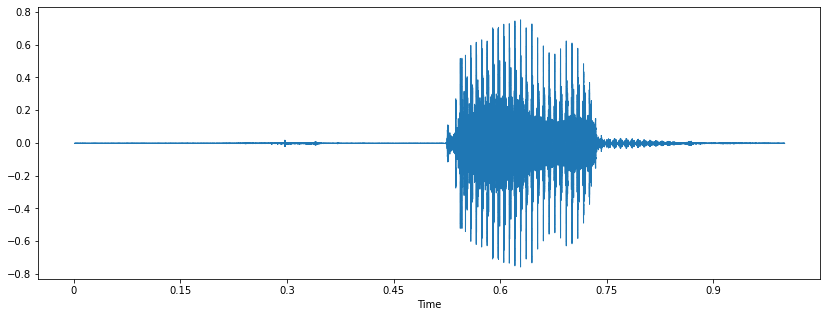

Graficar Espectograma
espectogramas/bed_00176480_nohash_0.pickle


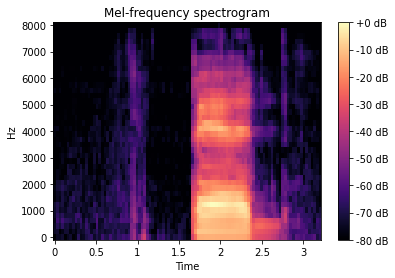

Clase down, Clase ID:3
Graficar Audio
down/00176480_nohash_0.wav


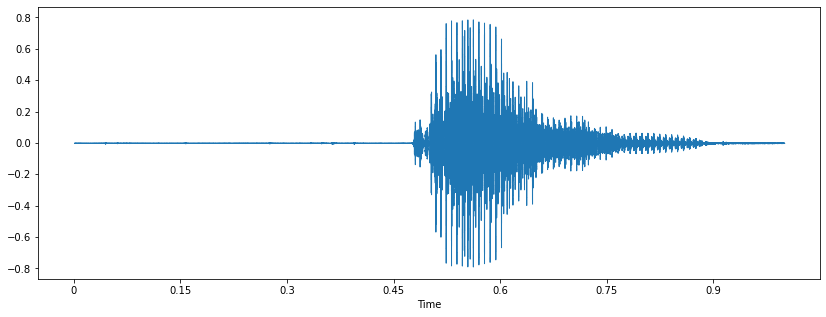

Graficar Espectograma
espectogramas/down_00176480_nohash_0.pickle


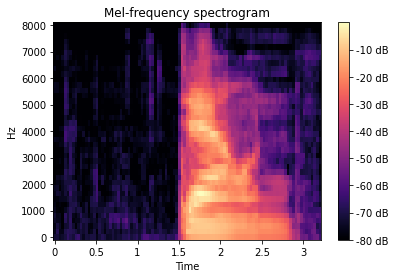

Clase go, Clase ID:9
Graficar Audio
go/004ae714_nohash_0.wav


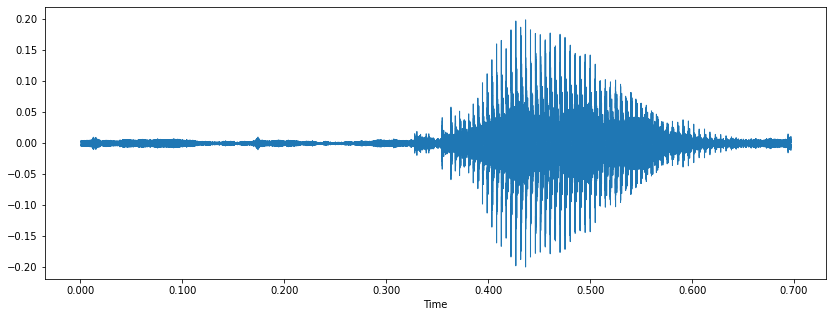

Graficar Espectograma
espectogramas/go_004ae714_nohash_0.pickle


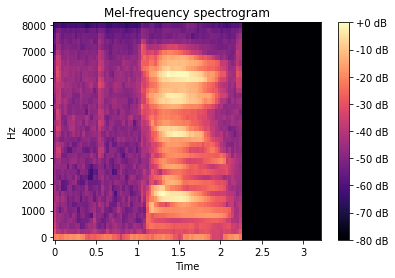

Clase left, Clase ID:4
Graficar Audio
left/00176480_nohash_0.wav


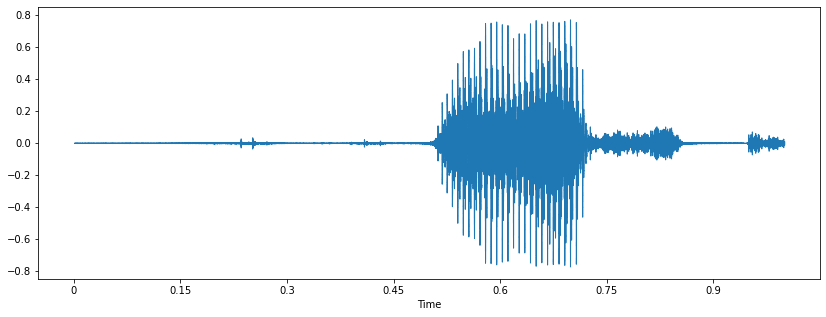

Graficar Espectograma
espectogramas/left_00176480_nohash_0.pickle


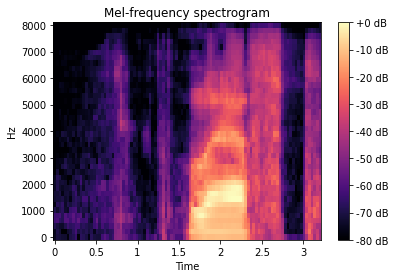

Clase no, Clase ID:1
Graficar Audio
no/012c8314_nohash_0.wav


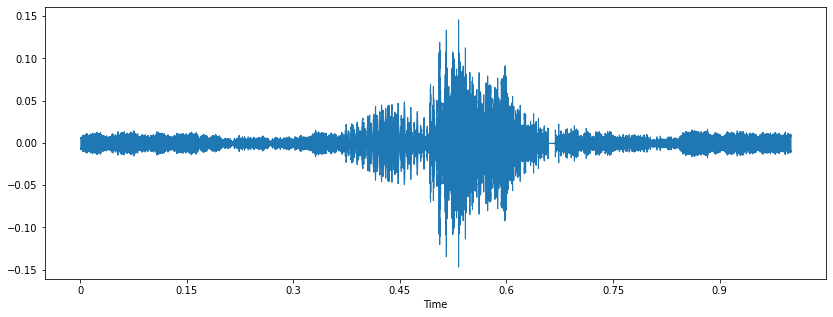

Graficar Espectograma
espectogramas/no_012c8314_nohash_0.pickle


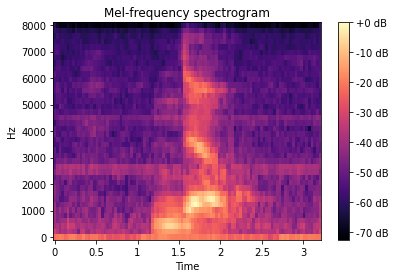

Clase off, Clase ID:7
Graficar Audio
off/00176480_nohash_0.wav


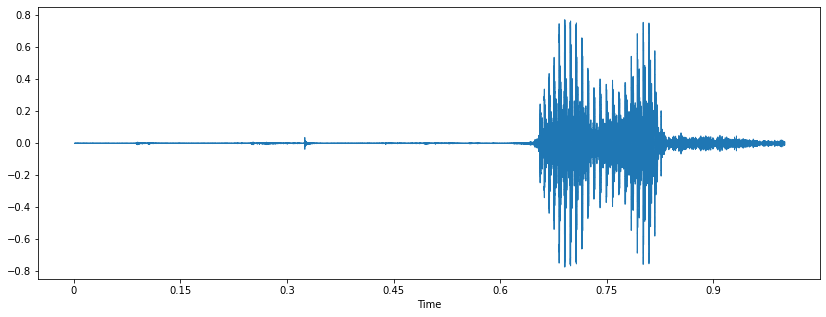

Graficar Espectograma
espectogramas/off_00176480_nohash_0.pickle


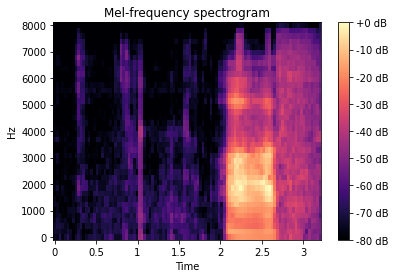

Clase on, Clase ID:6
Graficar Audio
on/004ae714_nohash_0.wav


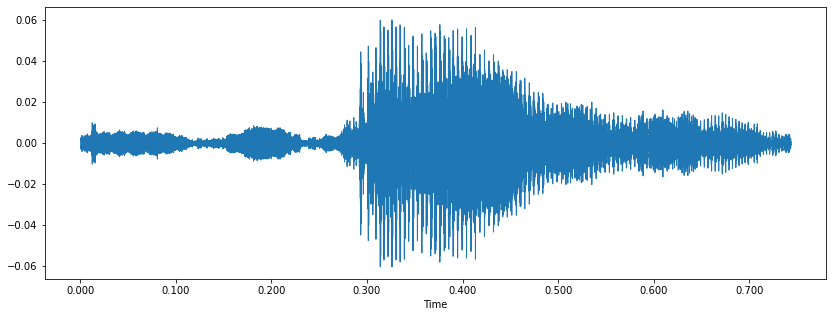

Graficar Espectograma
espectogramas/on_004ae714_nohash_0.pickle


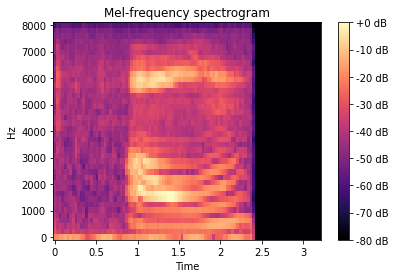

Clase right, Clase ID:5
Graficar Audio
right/00b01445_nohash_0.wav


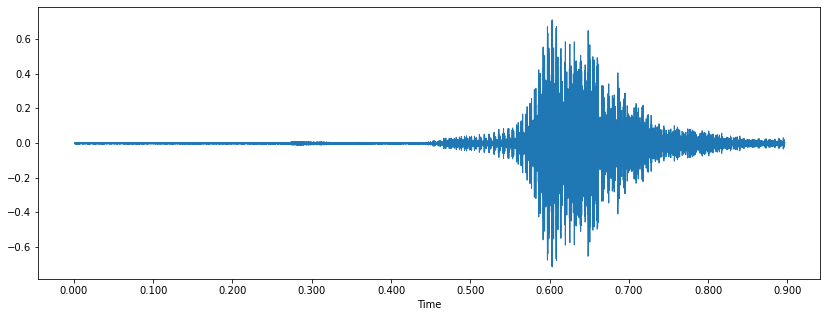

Graficar Espectograma
espectogramas/right_00b01445_nohash_0.pickle


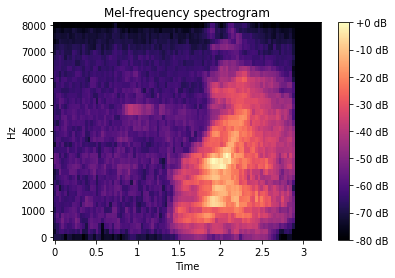

Clase stop, Clase ID:8
Graficar Audio
stop/004ae714_nohash_0.wav


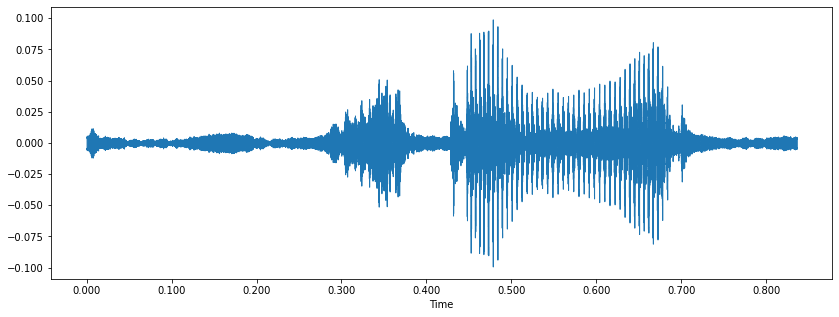

Graficar Espectograma
espectogramas/stop_004ae714_nohash_0.pickle


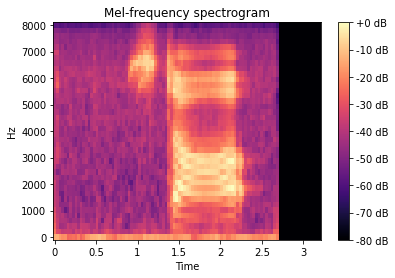

Clase up, Clase ID:2
Graficar Audio
up/004ae714_nohash_0.wav


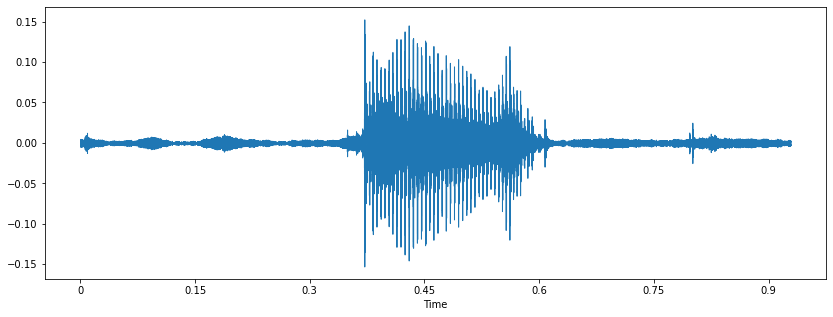

Graficar Espectograma
espectogramas/up_004ae714_nohash_0.pickle


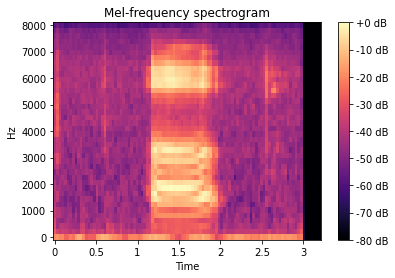

Clase yes, Clase ID:0
Graficar Audio
yes/004ae714_nohash_0.wav


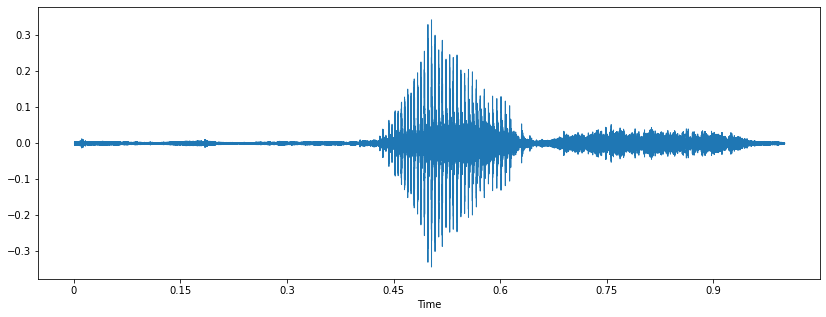

Graficar Espectograma
espectogramas/yes_004ae714_nohash_0.pickle


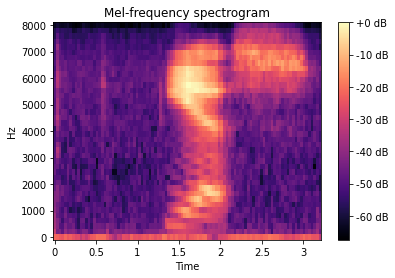

Clase silencio/rudio de fondo, Clase ID:10
Graficar Audio
_background_noise_/doing_the_dishes.wav


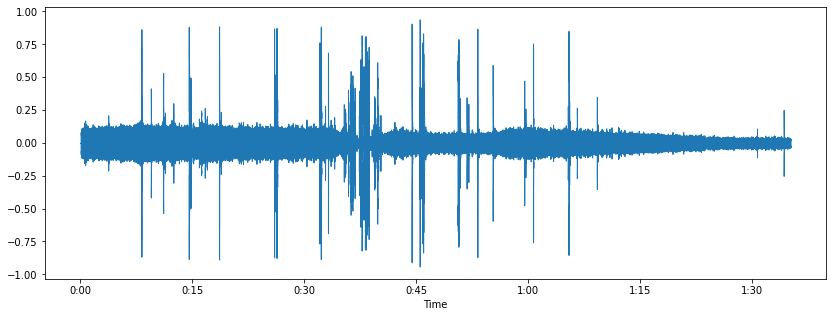

Graficar Espectograma
espectogramas/_background_noise__doing_the_dishes.pickle


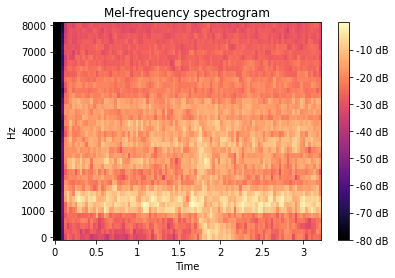

In [17]:
for i in range(len(df_clases_unicas['Clase'])):
    print('Clase ' + df_clases_unicas['Clase'][i] + ', Clase ID:' + str(df_clases_unicas['Clase ID'][i]) )
    print('Graficar Audio')
    path_audio = df_clases_unicas['Carpeta'][i] + '/' + df_clases_unicas['Archivos'][i]
    print(path_audio)
    plotAudio(path_audio)
    print('Graficar Espectograma')
    path_spect = 'espectogramas' + '/' + df_clases_unicas['Path de espectograma'][i]
    print(path_spect)
    plotSpectogram(path_spect)

Graficar histgorama

In [18]:
from scipy import stats 

In [19]:
spec = []
for i in range(len(df['Clase'])):
    path_spect = 'espectogramas' + '/' + df['Path de espectograma'][i]
    with open(path_spect, "rb") as f:
        S_dB = pickle.load(f)
    for listS in S_dB:
        for val in listS:
            spec.append(val)
spec = np.array(spec)
spec

array([-80.        , -74.69856262, -75.28205109, ...,  -9.42269135,
       -10.17160892, -16.52830887])

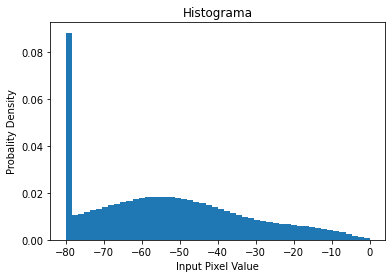

In [20]:
#path_spect = 'espectogramas' + '/' + 'bed_00176480_nohash_0.pickle'
#with open(path_spect, "rb") as f:
#        S_dB = pickle.load(f)
plt.hist(x=spec, bins=50, density=True)
plt.title('Histograma')
plt.xlabel('Input Pixel Value')
plt.ylabel('Probality Density')
plt.show() 

Revisar cantidad de datos de cada clase

In [21]:
freq = df.groupby(['Clase']).count() 
print(freq)

                         Carpeta  Archivos  Clase ID  Group  \
Clase                                                         
desconocido                41437     41437     41437  41437   
down                        2359      2359      2359   2359   
go                          2372      2372      2372   2372   
left                        2353      2353      2353   2353   
no                          2375      2375      2375   2375   
off                         2357      2357      2357   2357   
on                          2367      2367      2367   2367   
right                       2367      2367      2367   2367   
silencio/rudio de fondo        6         6         6      6   
stop                        2380      2380      2380   2380   
up                          2375      2375      2375   2375   
yes                         2377      2377      2377   2377   

                         Path de espectograma  
Clase                                          
desconocido          

Eliminar algunas  clases 

In [22]:
filas_desc_train = []
filas_desc_test = []
for i in range(len(df['Clase'])):
    if df['Clase'][i]  == 'desconocido' and df['Group'][i]  == 'Train':
        filas_desc_train.append(i)
    if df['Clase'][i]  == 'desconocido' and df['Group'][i]  == 'Test':
        filas_desc_test.append(i)
  

In [23]:
print(len(filas_desc_train))
print(len(filas_desc_test))

37216
4221


In [24]:
filas_desc_train = filas_desc_train[2000:]
filas_desc_test = filas_desc_test[1000:]
print(len(filas_desc_train))
print(len(filas_desc_test))

35216
3221


In [25]:
filas_desc = filas_desc_train + filas_desc_test 
df_dist = df.drop(filas_desc,axis=0)
df_dist = df_dist.reset_index()
df_dist

,index,Carpeta,Archivos,Clase,Clase ID,Group,Path de espectograma
0,0,bed,00176480_nohash_0.wav,desconocido,11,Train,bed_00176480_nohash_0.pickle
1,1,bed,004ae714_nohash_0.wav,desconocido,11,Train,bed_004ae714_nohash_0.pickle
2,2,bed,004ae714_nohash_1.wav,desconocido,11,Train,bed_004ae714_nohash_1.pickle
3,3,bed,00f0204f_nohash_0.wav,desconocido,11,Train,bed_00f0204f_nohash_0.pickle
4,4,bed,00f0204f_nohash_1.wav,desconocido,11,Train,bed_00f0204f_nohash_1.pickle
...,...,...,...,...,...,...,...
26683,65120,_background_noise_,dude_miaowing.wav,silencio/rudio de fondo,10,Train,_background_noise__dude_miaowing.pickle
26684,65121,_background_noise_,exercise_bike.wav,silencio/rudio de fondo,10,Train,_background_noise__exercise_bike.pickle
26685,65122,_background_noise_,pink_noise.wav,silencio/rudio de fondo,10,Train,_background_noise__pink_noise.pickle
26686,65123,_background_noise_,running_tap.wav,silencio/rudio de fondo,10,Train,_background_noise__running_tap.pickle


In [26]:
freq = df_dist.groupby(['Clase']).count() 
print(freq)

                         index  Carpeta  Archivos  Clase ID  Group  \
Clase                                                                
desconocido               3000     3000      3000      3000   3000   
down                      2359     2359      2359      2359   2359   
go                        2372     2372      2372      2372   2372   
left                      2353     2353      2353      2353   2353   
no                        2375     2375      2375      2375   2375   
off                       2357     2357      2357      2357   2357   
on                        2367     2367      2367      2367   2367   
right                     2367     2367      2367      2367   2367   
silencio/rudio de fondo      6        6         6         6      6   
stop                      2380     2380      2380      2380   2380   
up                        2375     2375      2375      2375   2375   
yes                       2377     2377      2377      2377   2377   

                   

Histograma despues de eliminar clases

In [27]:
spec = []
for i in range(len(df_dist['Clase'])):
    path_spect = 'espectogramas' + '/' + df['Path de espectograma'][i]
    with open(path_spect, "rb") as f:
        S_dB = pickle.load(f)
    for listS in S_dB:
        for val in listS:
            spec.append(val)
spec = np.array(spec)

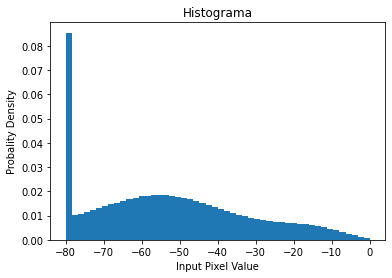

In [28]:
plt.hist(x=spec, bins=50, density=True)
plt.title('Histograma')
plt.xlabel('Input Pixel Value')
plt.ylabel('Probality Density')
plt.show()

6. Genere muestras de ruido de fondo:

In [29]:
import scipy.io.wavfile as waves
from itertools import accumulate

In [30]:
grouped = df.groupby(df.Clase)
df_ruido = grouped.get_group("silencio/rudio de fondo")
df_ruido = df_ruido.reset_index()
df_ruido 

,index,Carpeta,Archivos,Clase,Clase ID,Group,Path de espectograma
0,65119,_background_noise_,doing_the_dishes.wav,silencio/rudio de fondo,10,Train,_background_noise__doing_the_dishes.pickle
1,65120,_background_noise_,dude_miaowing.wav,silencio/rudio de fondo,10,Train,_background_noise__dude_miaowing.pickle
2,65121,_background_noise_,exercise_bike.wav,silencio/rudio de fondo,10,Train,_background_noise__exercise_bike.pickle
3,65122,_background_noise_,pink_noise.wav,silencio/rudio de fondo,10,Train,_background_noise__pink_noise.pickle
4,65123,_background_noise_,running_tap.wav,silencio/rudio de fondo,10,Train,_background_noise__running_tap.pickle
5,65124,_background_noise_,white_noise.wav,silencio/rudio de fondo,10,Train,_background_noise__white_noise.pickle


In [31]:
carpetas = []
archivos = []
for i in range(len(df_ruido['Carpeta'])): 
    carpeta = df_ruido['Carpeta'][i]
    archivo = df_ruido['Archivos'][i]
    archivo_audio = carpeta + '/' + archivo
    muestreo, sonido = waves.read(archivo_audio)
    duracion = len(sonido) /muestreo
    length_to_split =len(sonido)//duracion
    inicio = 0
    final = int(length_to_split)
    for i in range(int(duracion)):
        muestra  = sonido[inicio : final]
        inicio = final
        final = final + int(length_to_split)
        name, extensio = archivo.split('.')
        file_name = 'muestras_rudios' + '/' + name  + '_' + str(i) + '.wav'
        carpetas.append('muestras_rudios')
        archivos.append(name  + '_' + str(i) + '.wav')
        waves.write(file_name, muestreo, muestra)

C:\Users\psalazar\AppData\Local\Temp\ipykernel_12992\2144460583.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  muestreo, sonido = waves.read(archivo_audio)


In [32]:
dfruido = pd.DataFrame()
size = len(carpetas)
dfruido['Carpeta'] =  carpetas
dfruido['Archivos'] = archivos
dfruido['Clase'] = 'silencio/rudio de fondo'
dfruido['Clase ID'] =  10
group = []
for i in  range (size):
    if i%2 == 0:
        group.append("Train")
    else:
        group.append("Test")
dfruido['Group'] = group  
dfruido

,Carpeta,Archivos,Clase,Clase ID,Group
0,muestras_rudios,doing_the_dishes_0.wav,silencio/rudio de fondo,10,Train
1,muestras_rudios,doing_the_dishes_1.wav,silencio/rudio de fondo,10,Test
2,muestras_rudios,doing_the_dishes_2.wav,silencio/rudio de fondo,10,Train
3,muestras_rudios,doing_the_dishes_3.wav,silencio/rudio de fondo,10,Test
4,muestras_rudios,doing_the_dishes_4.wav,silencio/rudio de fondo,10,Train
...,...,...,...,...,...
393,muestras_rudios,white_noise_55.wav,silencio/rudio de fondo,10,Test
394,muestras_rudios,white_noise_56.wav,silencio/rudio de fondo,10,Train
395,muestras_rudios,white_noise_57.wav,silencio/rudio de fondo,10,Test
396,muestras_rudios,white_noise_58.wav,silencio/rudio de fondo,10,Train


Crear espectogramas

In [33]:
for i in range(len(dfruido['Archivos'])):
    file = dfruido['Archivos'][i]
    carpeta = dfruido['Carpeta'][i]
    path_audio = carpeta +  '/' + file
    name, extension = file.split('.')
    file_name = carpeta +  '_' +  name + '.pickle'
    S_dB = spectogram (path_audio)   
    path = 'espectogramas/'+ file_name
    with open(path, "wb") as f:
        pickle.dump(S_dB, f)

In [34]:
espectograma = []
for i in range(len(dfruido['Archivos'])):
    file = dfruido['Archivos'][i]
    carpeta = dfruido['Carpeta'][i]
    name, extension = file.split('.')
    file_name = carpeta +  '_' +  name + '.pickle'
    espectograma.append(file_name)
dfruido['Path de espectograma'] = espectograma
dfruido

,Carpeta,Archivos,Clase,Clase ID,Group,Path de espectograma
0,muestras_rudios,doing_the_dishes_0.wav,silencio/rudio de fondo,10,Train,muestras_rudios_doing_the_dishes_0.pickle
1,muestras_rudios,doing_the_dishes_1.wav,silencio/rudio de fondo,10,Test,muestras_rudios_doing_the_dishes_1.pickle
2,muestras_rudios,doing_the_dishes_2.wav,silencio/rudio de fondo,10,Train,muestras_rudios_doing_the_dishes_2.pickle
3,muestras_rudios,doing_the_dishes_3.wav,silencio/rudio de fondo,10,Test,muestras_rudios_doing_the_dishes_3.pickle
4,muestras_rudios,doing_the_dishes_4.wav,silencio/rudio de fondo,10,Train,muestras_rudios_doing_the_dishes_4.pickle
...,...,...,...,...,...,...
393,muestras_rudios,white_noise_55.wav,silencio/rudio de fondo,10,Test,muestras_rudios_white_noise_55.pickle
394,muestras_rudios,white_noise_56.wav,silencio/rudio de fondo,10,Train,muestras_rudios_white_noise_56.pickle
395,muestras_rudios,white_noise_57.wav,silencio/rudio de fondo,10,Test,muestras_rudios_white_noise_57.pickle
396,muestras_rudios,white_noise_58.wav,silencio/rudio de fondo,10,Train,muestras_rudios_white_noise_58.pickle


Unir muestras de ruido al dataset

In [35]:
df1 = pd.concat([df_dist,dfruido], ignore_index=True)
df1 = df1.drop(['index'], axis=1)
df1

,Carpeta,Archivos,Clase,Clase ID,Group,Path de espectograma
0,bed,00176480_nohash_0.wav,desconocido,11,Train,bed_00176480_nohash_0.pickle
1,bed,004ae714_nohash_0.wav,desconocido,11,Train,bed_004ae714_nohash_0.pickle
2,bed,004ae714_nohash_1.wav,desconocido,11,Train,bed_004ae714_nohash_1.pickle
3,bed,00f0204f_nohash_0.wav,desconocido,11,Train,bed_00f0204f_nohash_0.pickle
4,bed,00f0204f_nohash_1.wav,desconocido,11,Train,bed_00f0204f_nohash_1.pickle
...,...,...,...,...,...,...
27081,muestras_rudios,white_noise_55.wav,silencio/rudio de fondo,10,Test,muestras_rudios_white_noise_55.pickle
27082,muestras_rudios,white_noise_56.wav,silencio/rudio de fondo,10,Train,muestras_rudios_white_noise_56.pickle
27083,muestras_rudios,white_noise_57.wav,silencio/rudio de fondo,10,Test,muestras_rudios_white_noise_57.pickle
27084,muestras_rudios,white_noise_58.wav,silencio/rudio de fondo,10,Train,muestras_rudios_white_noise_58.pickle


7. Grafique la distribuci´on de las muestras del conjunto de entrenamiento y validaci´on

In [36]:
grouped = df1.groupby(df1.Group)
df1_train = grouped.get_group("Train")
df1_train = df1_train.reset_index()
df1_train

,index,Carpeta,Archivos,Clase,Clase ID,Group,Path de espectograma
0,0,bed,00176480_nohash_0.wav,desconocido,11,Train,bed_00176480_nohash_0.pickle
1,1,bed,004ae714_nohash_0.wav,desconocido,11,Train,bed_004ae714_nohash_0.pickle
2,2,bed,004ae714_nohash_1.wav,desconocido,11,Train,bed_004ae714_nohash_1.pickle
3,3,bed,00f0204f_nohash_0.wav,desconocido,11,Train,bed_00f0204f_nohash_0.pickle
4,4,bed,00f0204f_nohash_1.wav,desconocido,11,Train,bed_00f0204f_nohash_1.pickle
...,...,...,...,...,...,...,...
23305,27076,muestras_rudios,white_noise_50.wav,silencio/rudio de fondo,10,Train,muestras_rudios_white_noise_50.pickle
23306,27078,muestras_rudios,white_noise_52.wav,silencio/rudio de fondo,10,Train,muestras_rudios_white_noise_52.pickle
23307,27080,muestras_rudios,white_noise_54.wav,silencio/rudio de fondo,10,Train,muestras_rudios_white_noise_54.pickle
23308,27082,muestras_rudios,white_noise_56.wav,silencio/rudio de fondo,10,Train,muestras_rudios_white_noise_56.pickle


In [37]:
grouped = df1.groupby(df1.Group)
df1_test = grouped.get_group("Test")
df1_test = df1_test.reset_index()
df1_test

,index,Carpeta,Archivos,Clase,Clase ID,Group,Path de espectograma
0,18,bed,026290a7_nohash_0.wav,desconocido,11,Test,bed_026290a7_nohash_0.pickle
1,35,bed,060cd039_nohash_0.wav,desconocido,11,Test,bed_060cd039_nohash_0.pickle
2,36,bed,060cd039_nohash_1.wav,desconocido,11,Test,bed_060cd039_nohash_1.pickle
3,45,bed,099d52ad_nohash_0.wav,desconocido,11,Test,bed_099d52ad_nohash_0.pickle
4,66,bed,0e17f595_nohash_0.wav,desconocido,11,Test,bed_0e17f595_nohash_0.pickle
...,...,...,...,...,...,...,...
3771,27077,muestras_rudios,white_noise_51.wav,silencio/rudio de fondo,10,Test,muestras_rudios_white_noise_51.pickle
3772,27079,muestras_rudios,white_noise_53.wav,silencio/rudio de fondo,10,Test,muestras_rudios_white_noise_53.pickle
3773,27081,muestras_rudios,white_noise_55.wav,silencio/rudio de fondo,10,Test,muestras_rudios_white_noise_55.pickle
3774,27083,muestras_rudios,white_noise_57.wav,silencio/rudio de fondo,10,Test,muestras_rudios_white_noise_57.pickle


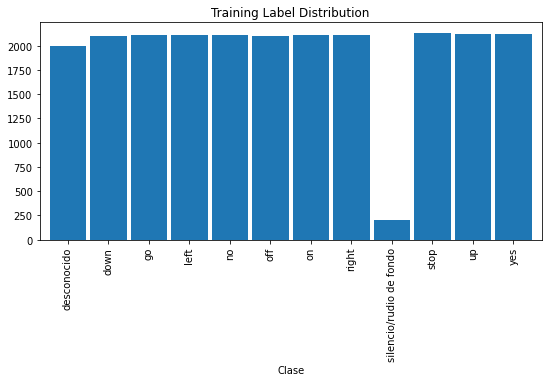

In [38]:
freq = df1_train.groupby(['Clase']).count() 
freq['index']
freq['index'].plot(kind = 'bar', 
             title = 'Training Label Distribution',
             stacked = 'True',          # Muestra las barras apiladas
             alpha = 1,               # nivel de transparencia
             width = 0.9,               # Grosor de las barras para dejar espacio entre ellas
             figsize=(9,4));            # Cambiamos el tamaño de la figura


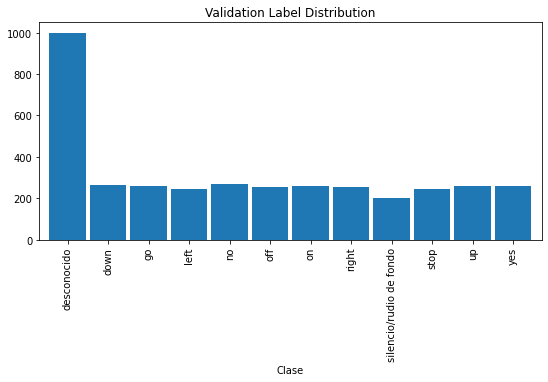

In [39]:
freq = df1_test.groupby(['Clase']).count() 
freq['index']
freq['index'].plot(kind = 'bar', 
            title = 'Validation Label Distribution',
             stacked = 'True',          # Muestra las barras apiladas
             alpha = 1,               # nivel de transparencia
             width = 0.9,               # Grosor de las barras para dejar espacio entre ellas
             figsize=(9,4));            # Cambiamos el tamaño de la figura

In [42]:
def writeSpectogram (specfile):
    with open(specfile, "rb") as f:
        S_dB = pickle.load(f)
    return S_dB

In [59]:
train = []
for i in range(len(df1_train['Clase'])):
    path_spect = 'espectogramas' + '/' + df1_train['Path de espectograma'][i]
    spec = writeSpectogram(path_spect)
    train.append(spec)

df1_train['Features'] = train

In [62]:
test = []
for i in range(len(df1_test['Clase'])):
    path_spect = 'espectogramas' + '/' + df1_test['Path de espectograma'][i]
    spec = writeSpectogram(path_spect)
    test.append(spec)

df1_test['Features'] = test

In [63]:
df1_train.to_csv('train.csv', header=True, index=False)
df1_test.to_csv('test.csv', header=True, index=False)

In [64]:
df1_train

,index,Carpeta,Archivos,Clase,Clase ID,Group,Path de espectograma,Features
0,0,bed,00176480_nohash_0.wav,desconocido,11,Train,bed_00176480_nohash_0.pickle,"[[-80.0, -74.69856, -75.28205, -73.09368, -79...."
1,1,bed,004ae714_nohash_0.wav,desconocido,11,Train,bed_004ae714_nohash_0.pickle,"[[-27.121634, -23.92298, -25.54161, -24.23914,..."
2,2,bed,004ae714_nohash_1.wav,desconocido,11,Train,bed_004ae714_nohash_1.pickle,"[[-21.46596756008906, -21.403194871730197, -21..."
3,3,bed,00f0204f_nohash_0.wav,desconocido,11,Train,bed_00f0204f_nohash_0.pickle,"[[-34.06555, -32.995716, -31.083933, -32.61664..."
4,4,bed,00f0204f_nohash_1.wav,desconocido,11,Train,bed_00f0204f_nohash_1.pickle,"[[-31.087196, -32.80756, -40.513783, -33.28463..."
...,...,...,...,...,...,...,...,...
23305,27076,muestras_rudios,white_noise_50.wav,silencio/rudio de fondo,10,Train,muestras_rudios_white_noise_50.pickle,"[[-10.548386, -5.538317, -6.2453275, -10.35306..."
23306,27078,muestras_rudios,white_noise_52.wav,silencio/rudio de fondo,10,Train,muestras_rudios_white_noise_52.pickle,"[[-15.710672, -7.3389506, -12.756108, -9.89048..."
23307,27080,muestras_rudios,white_noise_54.wav,silencio/rudio de fondo,10,Train,muestras_rudios_white_noise_54.pickle,"[[-6.1933055, -5.810249, -11.287003, -3.874721..."
23308,27082,muestras_rudios,white_noise_56.wav,silencio/rudio de fondo,10,Train,muestras_rudios_white_noise_56.pickle,"[[-12.020442, -13.825082, -10.845329, -7.95835..."


In [65]:
df1_test

,index,Carpeta,Archivos,Clase,Clase ID,Group,Path de espectograma,Features
0,18,bed,026290a7_nohash_0.wav,desconocido,11,Test,bed_026290a7_nohash_0.pickle,"[[-40.693756, -32.30535, -28.853271, -39.51148..."
1,35,bed,060cd039_nohash_0.wav,desconocido,11,Test,bed_060cd039_nohash_0.pickle,"[[-15.707949, -15.367563, -17.345299, -20.8118..."
2,36,bed,060cd039_nohash_1.wav,desconocido,11,Test,bed_060cd039_nohash_1.pickle,"[[-11.758614, -7.921635, -10.664358, -9.507205..."
3,45,bed,099d52ad_nohash_0.wav,desconocido,11,Test,bed_099d52ad_nohash_0.pickle,"[[-80.0, -75.4673, -79.16359, -71.7785, -79.37..."
4,66,bed,0e17f595_nohash_0.wav,desconocido,11,Test,bed_0e17f595_nohash_0.pickle,"[[-65.71613, -70.95447, -68.686485, -58.305954..."
...,...,...,...,...,...,...,...,...
3771,27077,muestras_rudios,white_noise_51.wav,silencio/rudio de fondo,10,Test,muestras_rudios_white_noise_51.pickle,"[[-3.9307709, -10.173052, -7.929357, -7.05914,..."
3772,27079,muestras_rudios,white_noise_53.wav,silencio/rudio de fondo,10,Test,muestras_rudios_white_noise_53.pickle,"[[-18.199886, -11.41806, -11.310036, -10.53619..."
3773,27081,muestras_rudios,white_noise_55.wav,silencio/rudio de fondo,10,Test,muestras_rudios_white_noise_55.pickle,"[[-14.178193, -5.9481187, -7.1092405, -7.63470..."
3774,27083,muestras_rudios,white_noise_57.wav,silencio/rudio de fondo,10,Test,muestras_rudios_white_noise_57.pickle,"[[-10.7254715, -15.1413, -19.648088, -14.52889..."
